# 1. Import required librairies

In [ ]:
# install pytorch
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
# install fast ai v1 librairy for Pytorch
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 382, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 201, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 365, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 313, in _get_abstract_dist_for
    req, self.session, self.finder, self.require_hashes
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/operations/prepare.py", line 194, i

In [ ]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
import matplotlib.pyplot as pyplot
import seaborn as sns
import re
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
# remove urls
def remove_url(text):
    cleaned_text=re.sub(r'http\S+', '', text)
    return cleaned_text

In [ ]:
def punctuation(sentence): 
    # punctuation marks 
    punctuations = '''[]{}@#$%^\/_'''
    # traverse the given string and if any punctuation 
    # marks occur replace it with null 
    for x in sentence.lower(): 
        if x in punctuations: 
            sentence = sentence.replace(x, "") 
    return sentence

In [ ]:
def normalize_text(text):
  normalized_text=remove_url(text)
  normalized_text=punctuation(normalized_text)
  return normalized_text

In [ ]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [ ]:
# plot training history (loss and accuracy metrics for training and validation set)
def plot_training_history(history):
  # plot loss and accuracy history
  from pylab import rcParams
  rcParams['figure.figsize'] = 13, 9
  # plot loss during training
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.legend()
  pyplot.show()

# 2. Import dataset

In [ ]:
# connect to google Drive to import files
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
# import dataset
# load data set
data="../gdrive/My Drive/colab/twitter_disaster/train_processed_data.csv"
df=pd.read_csv(data)
df.dropna(inplace=True)
df.isna().sum()

id              0
text            0
cleaned_text    0
target          0
dtype: int64

In [ ]:
# remove non ASCII charts
df['text']=df['text'].apply(lambda x: clean_ascii(x))

In [ ]:
# transform to a normal text format (remove URLs and hashtags)
df['normalized_text']=df['text'].apply(lambda x: normalize_text(x))

In [ ]:
# create a dataframe consisting of the text documents and their corresponding labels
df = pd.DataFrame({'label':df.target, 'text':df.text})
print(df.shape)
df.head()

(7612, 2)


,label,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' are ...
3,1,"13,000 people receive #wildfires evacuation or..."
4,1,Just got sent this photo from Ruby #Alaska as ...


In [ ]:
# check label distribution
df['label'].value_counts()

0    4341
1    3271
Name: label, dtype: int64

# 3. text preprocessing

In [ ]:
# remove characters that are not letters
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")
df.head()

,label,text
0,10,Well I will have to change the scoring on my ...
1,1,Archive name graphics resources list part La...
2,10,And of course Mike Ramsey was at one time ...
3,10,As I promised I would give you the name of th...
4,10,GAME S OF ADIRONDACK C...


In [ ]:
df.at[0,'text']

'Well  I will have to change the scoring on my playoff pool   Unfortunately I don t have time right now  but I will certainly post the new scoring rules by tomorrow   Does it matter   No  you ll enter anyway     Good          Keith Keller    LET S GO RANGERS            LET S GO QUAKERS       kkeller mail sas upenn edu  IVY LEAGUE CHAMPS    '

In [ ]:
# define stop words to remove from the text
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# tokenization before applying cleaning functions
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['text'] = detokenized_doc

In [ ]:
df.at[0,'text']

' deeds reason earthquake forgive allah'

# 4. training

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.25, random_state = 1)

df_trn.shape, df_val.shape

((5709, 2), (1903, 2))

In [ ]:
# prepare the data for the language model and the classification model

# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", min_freq=2)

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, min_freq=2, bs=16)

In [ ]:
data_clas.save()

In [ ]:
data_clas.show_batch()

text,target
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1


The rules are all listed below, here is the meaning of the special tokens:

UNK (xxunk) is for an unknown word (one that isn't present in the current vocabulary)

PAD (xxpad) is the token used for padding, if we need to regroup several texts of different lengths in a batch

BOS (xxbos) represents the beginning of a text in your dataset

FLD (xxfld) is used if you set mark_fields=True in your TokenizeProcessor to separate the different fields of texts (if your texts are loaded from several columns in a dataframe)

TK_MAJ (xxmaj) is used to indicate the next word begins with a capital in the original text

TK_UP (xxup) is used to indicate the next word is written in all caps in the original text

TK_REP (xxrep) is used to indicate the next character is repeated n times in the original text (usage xxrep n {char})

TK_WREP(xxwrep) is used to indicate the next word is repeated n times in the original text (usage xxwrep n {word})

# 5. Fine-Tuning the Pre-Trained Model and Making Predictions

## 5.1. language model

In [ ]:
# create a learner object, ‘learn’, that will directly create a model, download the pre-trained weights, and be ready for fine-tuning
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 5.25E-02


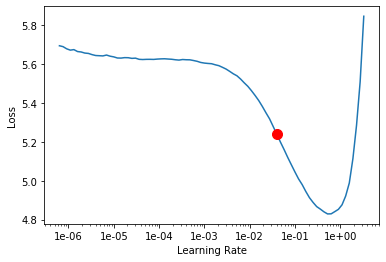

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
#from keras.callbacks import ModelCheckpoint
from fastai.callbacks import SaveModelCallback

In [ ]:
# train the learner object with learning rate = 1.74E-01
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.192947,3.335426,0.426042,00:04
1,3.346865,3.202737,0.443304,00:04


In [ ]:
# unfreezing weights and training the rest of the NN
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.612626,3.107264,0.460236,00:04
1,2.463362,3.102232,0.463520,00:04


In [ ]:
# try language model: predict the next word
learn.predict("People need", n_words=5)

'People need to talk about it but'

In [ ]:
# save encoder to use it for classification later
learn.save_encoder('ft_enc')

## 5.2 train the classifier using the languag model

In [ ]:
#use the data_clas object we created earlier to build a classifier with our fine-tuned encoder.
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.6)
#learn1 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [ ]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5709 items)
x: TextList
xxbos xxmaj new xxup xxunk xxmaj ignition xxmaj knock ( xxmaj detonation ) xxmaj sensor xxup xxunk http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxmaj bloody insomnia again ! g xxrep 4 r ! ! # xxmaj insomnia,xxbos my school just put the evacuation alarms on xxunk with 2 different trial xxunk happening are you kidding me,xxbos ' xxmaj if a xxunk of soldiers will be blown up nobody xxunk but when one little lion dies everyone loses their mind ' 
  http : / / t.co / xxunk,xxbos xxmaj when i breathe it sounds like a windstorm . xxmaj haha cool
y: CategoryList
0,1,0,1,0
Path: .;

Valid: LabelList (1903 items)
x: TextList
xxbos xxmaj xxunk xxmaj xxunk xxmaj rob xxmaj xxunk xxmaj xxunk xxmaj blight xxmaj xxunk xxmaj leo xxmaj xxunk xxmaj xxunk and a few others . i will drink a beer with them . xxmaj xxunk .,xxbos the stars are burning i here your voice in my mind,xxbos xxunk xxmaj it got pretty xxunk here to

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-03
Min loss divided by 10: 6.31E-04


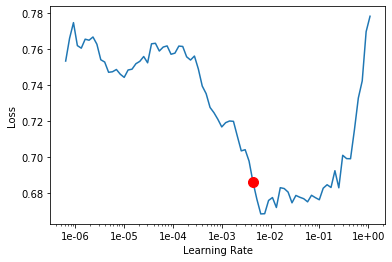

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
# fit our model
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.600677,0.524099,0.743037,00:11
1,0.517135,0.485849,0.787178,00:12


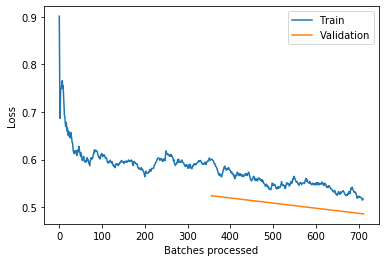

In [ ]:
learn.recorder.plot_losses()

## Gradual unfreezing

Use gradual unfreezing technique to train the classifier

training the last few layers, then go backwards and unfreeze and train layers before. We can use the learner function learn.freeze_to(-2) to unfreeze the last 2 layers.

In [ ]:
# unfreeze and train the last 2 layers with the function learn.freeze_to(-2) 
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-4,1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.558282,0.500593,0.763006,00:12
1,0.503893,0.466426,0.792433,00:12
2,0.463266,0.451602,0.799264,00:12


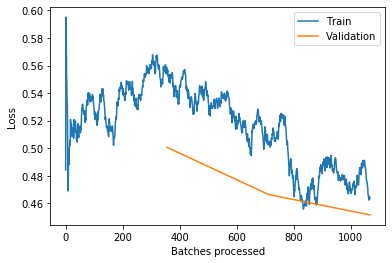

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# unfreeze and train the last 3 layers with the function learn.freeze_to(-3) 
learn.freeze_to(-3)
learn.fit_one_cycle(3, slice(1e-5,5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.472520,0.465520,0.787704,00:12
1,0.468394,0.460215,0.796637,00:12
2,0.417638,0.446276,0.807672,00:13


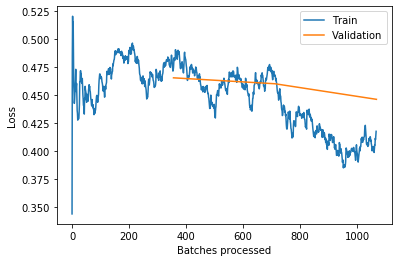

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# unfreeze all layers and train the model at a low learning rate
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.405760,0.461184,0.802943,00:14
1,0.396194,0.457489,0.806096,00:12
2,0.389805,0.456877,0.800315,00:13
3,0.337943,0.464966,0.803994,00:13


# 6. validation

In [ ]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)

# confusion matrix
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,977,265
1,108,553


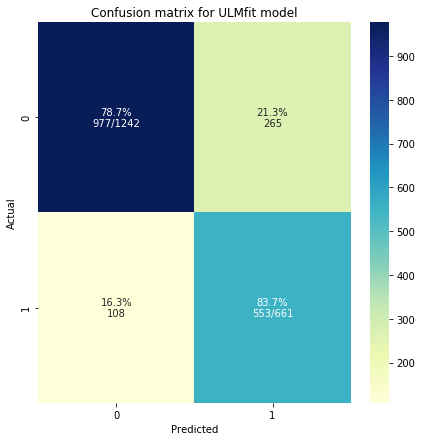

In [ ]:
plot_cm(predictions, targets, 'Confusion matrix for ULMfit model', figsize=(7,7))

# 7. predictions on test set

In [ ]:
def get_predictions(learn,text):
  pred=learn.predict(text)
  pred=int(pred[0])
  return pred

In [ ]:
test=learn.predict("EXPLOSION ACCIDENT PEOPLE DIE!!")
test

(Category 1, tensor(1), tensor([0.3812, 0.6188]))

In [ ]:
# predictions on the whole test set
test_data="../gdrive/My Drive/colab/twitter_disaster/test_processed_data.csv"
df_sample=pd.read_csv(test_data)
# transform to a normal text format (remove URLs and hashtags)
#df_sample['normalized_text']=df_sample['text'].apply(lambda x: normalize_text(x))

In [ ]:
df_sample.head()

,id,text,cleaned_text
0,0,Just happened a terrible car crash,car crash terrible happen
1,2,"Heard about #earthquake is different cities, s...",earthquake cities everyone hear different saf...
2,3,"there is a forest fire at spot pond, geese are...",fire spot pond flee street forest geese save not
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse spokane wildfires light
4,11,Typhoon Soudelor kills 28 in China and Taiwan,soudelor kill china taiwan typhoid


In [ ]:
!pip install tqdm --upgrade

     |████████████████████████████████| 61kB 3.7MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [ ]:
from tqdm.auto import tqdm

In [ ]:
tqdm.pandas()

ImportError: ignored

In [ ]:
df_sample['target']=df_sample['text'].apply(lambda x: get_predictions(learn,x))

In [ ]:
df_sample.shape

(3263, 4)

In [ ]:
submissions=df_sample[['id','target']]
submissions.to_csv('../gdrive/My Drive/colab/twitter_disaster/submissions/predictions_ulmfit.csv',index=False)

In [ ]:
submissions['target'].value_counts()

0    2215
1    1048
Name: target, dtype: int64